In [2]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df = pd.read_csv('/content/drive/MyDrive/League of Legends Champion Stats 12.1.csv.xls', sep=";")

In [13]:
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57%,34.06%,4.24%,12.88%,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46%,58.01%,4.83%,21.91%,2.23


In [14]:
df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %      object
Role %     object
Pick %     object
Ban %      object
KDA       float64
dtype: object

In [15]:
print(f'data dimensions: { df.shape}')
print(f'data column names: { df.columns.values.tolist()}')

data dimensions: (232, 11)
data column names: ['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %', 'KDA']


In [16]:
Class = df.Class.unique().tolist()
print(f'The Classes of Champions in this dataset are {Class}')

The Classes of Champions in this dataset are ['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank', 'Support', nan]


In [17]:
Role = df.Role.unique().tolist()
print(f'The Roles of Champions in this dataset are {Role}')

The Roles of Champions in this dataset are ['TOP', 'MID', 'SUPPORT', 'JUNGLE', 'ADC']


In [18]:
df.isnull().sum()

Name      0
Class     1
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

In [19]:
df["Win %"] = df["Win %"].str[:-1]
df["Role %"] = df["Role %"].str[:-1]
df["Pick %"] = df["Pick %"].str[:-1]
df["Ban %"] = df["Ban %"].str[:-1]
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97,94.62,4.43,2.03,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93,93.47,4.62,1.04,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59,65.65,8.16,12.88,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57,34.06,4.24,12.88,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46,58.01,4.83,21.91,2.23


In [20]:
df[['Win %','Role %', 'Pick %', 'Ban %']] = df[['Win %','Role %', 'Pick %', 'Ban %']].apply(pd.to_numeric)

In [22]:
df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

In [23]:
df_TOP = df.loc[df['Role'] == 'TOP'].reset_index()
df_MID = df.loc[df['Role'] == 'MID'].reset_index()
df_SUP = df.loc[df['Role'] == 'SUPPORT'].reset_index()
df_JG = df.loc[df['Role'] == 'JUNGLE'].reset_index()
df_ADC = df.loc[df['Role'] == 'ADC'].reset_index()

In [24]:
count_class = df.groupby('Class').Name.count().reset_index()
count_class

,Class,Name
0,Assassin,26
1,Fighter,68
2,Mage,62
3,Marksman,31
4,Support,16
5,Tank,28


In [25]:
count_role = df.groupby('Role').Name.count().reset_index()
count_role

,Role,Name
0,ADC,27
1,JUNGLE,46
2,MID,58
3,SUPPORT,41
4,TOP,60


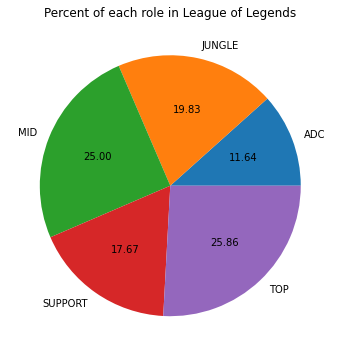

In [26]:
plt.figure(figsize=(14,6))
plt.pie(count_role.Name, labels = count_role.Role,autopct='%.2f')
plt.title('Percent of each role in League of Legends')
plt.show()

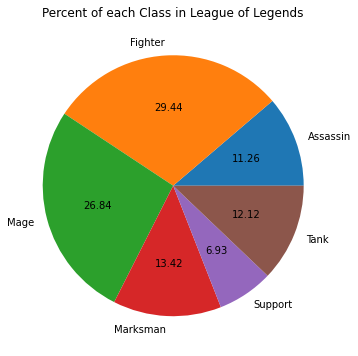

In [27]:
plt.figure(figsize=(14,6))
plt.pie(count_class.Name, labels = count_class.Class,autopct='%.2f')
plt.title('Percent of each Class in League of Legends')
plt.show()

In [28]:
df_ADC_copy = df_ADC.copy()
df_ADC_copy = df_ADC_copy.sort_values(by=['Pick %'], ascending =False).reset_index()
df_ADC_copy.head()

,level_0,index,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,6,69,Jhin,Marksman,ADC,God,94.23,3.23,51.03,99.02,24.55,5.81,3.01
1,7,70,Jinx,Marksman,ADC,God,86.76,-1.22,51.32,99.51,22.27,6.98,2.43
2,2,21,Caitlyn,Marksman,ADC,God,88.48,-0.16,50.09,98.70,21.30,18.96,2.31
3,4,37,Ezreal,Marksman,ADC,God,75.98,1.83,49.28,97.47,20.07,5.20,2.39
4,8,71,Kai'Sa,Marksman,ADC,God,75.52,10.50,49.48,97.77,19.45,5.95,2.42


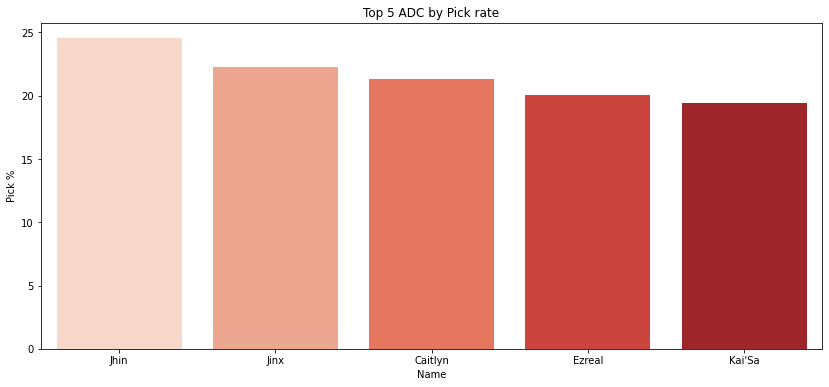

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(x='Name', y='Pick %',data= df_ADC_copy[:5],palette = "Reds")
plt.title('Top 5 ADC by Pick rate')
plt.show()

<Figure size 1008x720 with 0 Axes>

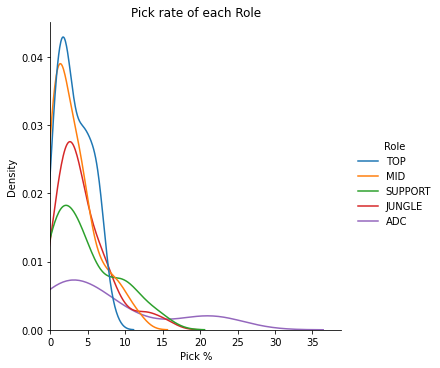

In [30]:
plt.figure(figsize=(14,10))
sns.displot(x='Pick %',data=df,hue='Role',kind='kde')
plt.xlim(0)
plt.title('Pick rate of each Role')
plt.show()

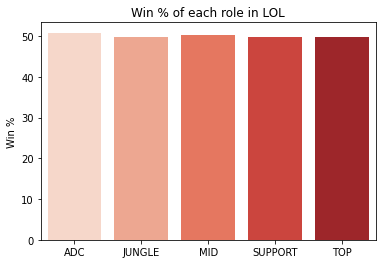

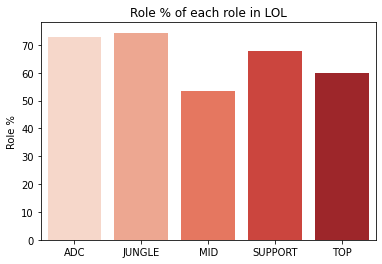

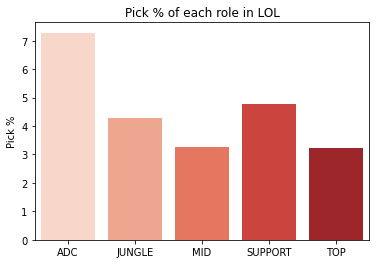

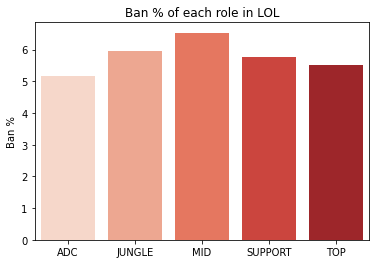

In [31]:
win_rate_role = df.groupby('Role')[['Win %','Role %', 'Pick %', 'Ban %']].mean().reset_index()
for i in ['Win %','Role %', 'Pick %', 'Ban %']:
    sns.barplot(x='Role', y=i, data= win_rate_role,palette = "Reds")
    plt.xlabel('')
    plt.title(f'{i} of each role in LOL')
    plt.show()

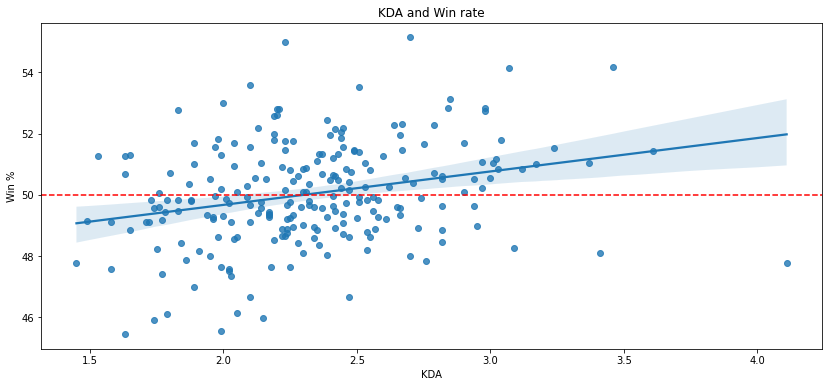

In [32]:
plt.figure(figsize=(14,6))
graph = sns.regplot(x='KDA',y='Win %', data=df)
graph.axhline(50, color='red',ls='--')
plt.title('KDA and Win rate')
plt.show()

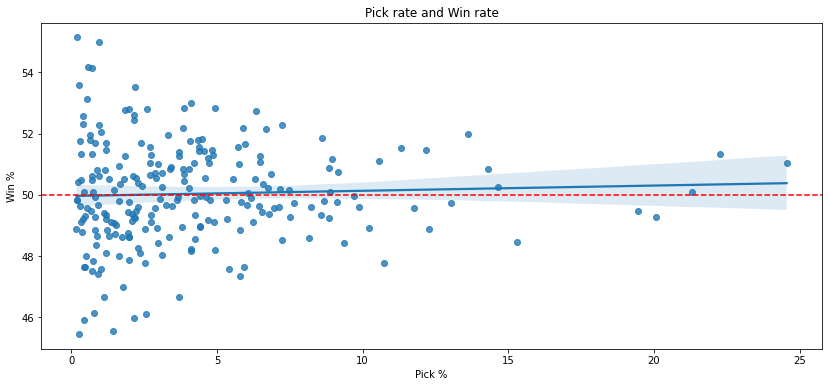

In [33]:
plt.figure(figsize=(14,6))
graph = sns.regplot(x='Pick %',y='Win %', data=df)
graph.axhline(50, color='red',ls='--')
plt.title('Pick rate and Win rate')
plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


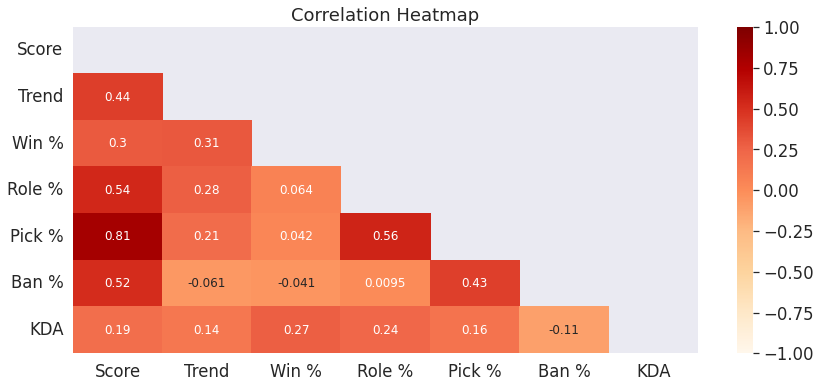

In [34]:
plt.figure(figsize=(14,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.5)
plt.rc('font', family='Times New Roman', size=12)
sns.heatmap(df.corr(), mask =mask, vmin=-1, vmax=1, annot=True, cmap='OrRd')
plt.title('Correlation Heatmap')
plt.show()

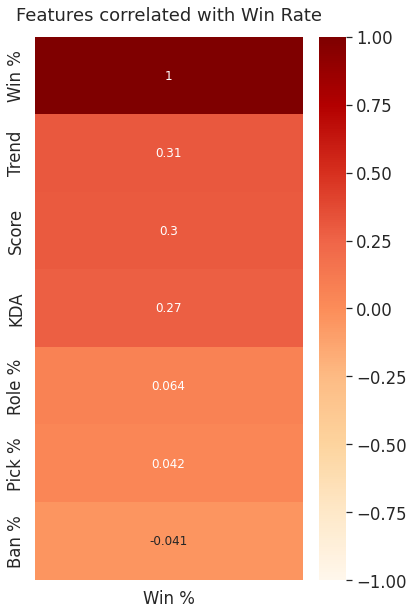

In [35]:
plt.figure(figsize=(6, 10))
sns.heatmap(df.corr()[['Win %']].sort_values(by='Win %', ascending=False), vmin=-1, vmax=1, annot=True, cmap='OrRd')
plt.title('Features correlated with Win Rate', pad =16)
plt.show()

**Conclusion**

There are few conclusions :

ADC seems to have highest popularity among all the roles in legend of leagues. Top 5 most picked ADCs are Jhin, Jinx, Caitlyn, Ezreal and Kai'Sa.

MID Champions have highest ban rate and lowest pick rate.
KDA(Kills Deaths Assists),Trend and Score of a Champ have strong correlation with win rate.

Ban rate, Pick rate and Role rate only have little correlation with win rate.

In summary, to have a high win rate in legend of leagues Trend and Score of a champion is important, some champion simply are more powerful than others.




